In [1]:
# Author: Leonie Küchenhoff
# Date: Dec 17th, 2022
# Script to compare coverge across samples

In [6]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
from config import basedir, outdir
import numpy as np
import seaborn as sns

In [7]:
# directory settings
os.chdir(basedir)
outdir = str(outdir + '/coverage_all/')
print('This base directory will be used:\n', basedir)
os.chdir(basedir)

This base directory will be used:
 /g/steinmetz/project/leonie_crispr/03_data/02_rnaseq/snakemake/


In [21]:
# sample names
names = ['028_pbs_R', '029_pbs_R', '030_nrch_R','033_nrch_R', '032_pbs_R', '036_nrch_R', 
            '011_pbs', '012_nrch', '013_nrch', '014_nrch', '279_spry', '321_pbs', '333_pbs', '450_spry', '283_spry']
# treatment in same order as sample names
based_editor = ['pbs', 'pbs', '8e-NRCH', '8e-NRCH', 'pbs', '8e-NRCH',
            'pbs', '8e-NRCH', '8e-NRCH','8e-NRCH', 'max-SpRY', 'pbs', 'pbs', 'max-SpRY', 'max-SpRY']
mutation = ['R636Q' if i[-1] == 'R' else 'P635L' for i in names]
condition = [i+' - '+j for i,j in zip(based_editor, mutation)]
chromosomes = ['chr1','chr2','chr3','chr4','chr5','chr6', 'chr7', 'chr8', 'chr9','chr10',
'chr11','chr12','chr13','chr14','chr15','chr16', 'chr17', 'chr18', 'chr19']

# Path to tissue specific variants
paths = [f'coverage/L{i}.bed' for i in names]+ [f'coverage/H{i}.bed' for i in names]


In [22]:
def read_and_filter(path):
    '''
    function to read coverage file and filter for chromosomes
    Counts bins with ccoverage >=5 an returns number
    '''
    file = pd.read_csv(path, header = None, sep = '\t', names = ['chr', 'start', 'stop', 'cov'])
    file = file[file['chr'].isin(chromosomes)]
    length = file[file['cov'] >= 5].shape[0]
    return length

In [23]:
heart_length = np.zeros(15)
liver_length = np.zeros(15)
for count,i in enumerate(names):
    liver_length[count] = read_and_filter(f'coverage/L{i}.bed')
    heart_length[count] = read_and_filter(f'coverage/H{i}.bed')

In [24]:
save = pd.DataFrame(data = {'sample':names, 'heart':heart_length, 'liver':liver_length})
save.to_csv(f'{outdir}/areas_above4.txt', index = False)

In [25]:
save['condition'] = condition
save['base_editor'] = based_editor
save['mutation'] = mutation
reformat = save.melt(id_vars = ['sample', 'condition', 'base_editor', 'mutation']).rename(columns = {'variable':'tissue', 'value': 'reads_above4'})

In [26]:
colors = ['bisque',
          'orange',
          'azure',
          'steelblue',
          'navy'
          ]
costum_palette_box = sns.color_palette(colors)

In [27]:
plt.rcParams.update({'font.size':18, 'text.usetex': False,
"svg.fonttype": 'none'})

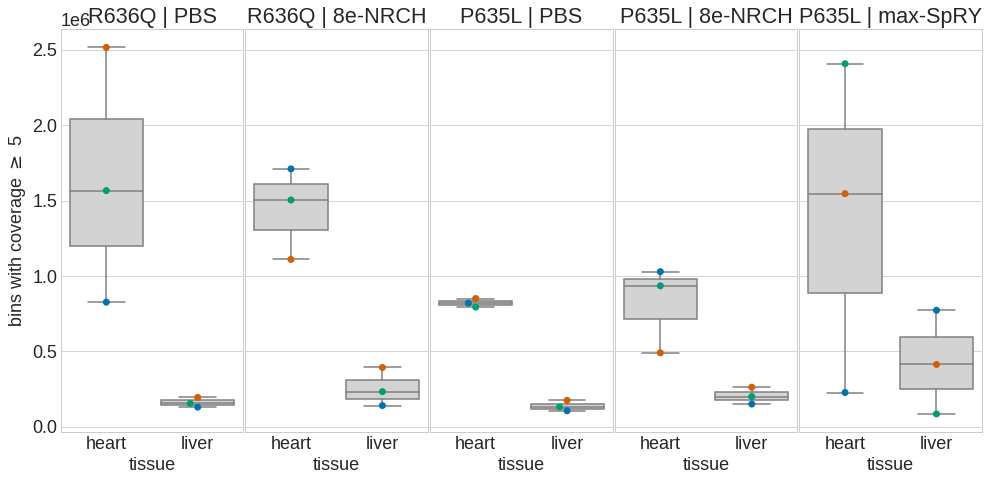

In [29]:
fig, axs = plt.subplots(1,5, figsize = (16,7), sharey = True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

data = reformat[(reformat['base_editor'] == '8e-NRCH') & (reformat['mutation'] == 'R636Q')]

sns.boxplot(x = 'tissue', y = 'reads_above4', data = data, color = 'lightgrey', ax = axs[1])
sns.swarmplot(x = 'tissue', y = 'reads_above4', data = data, hue = 'sample', size = 7, ax = axs[1])


data = reformat[(reformat['base_editor'] == 'pbs') & (reformat['mutation'] == 'R636Q')]

sns.boxplot(x = 'tissue', y = 'reads_above4', data = data, color = 'lightgrey', ax = axs[0])
sns.swarmplot(x = 'tissue', y = 'reads_above4', data = data, hue = 'sample', size = 7, ax = axs[0])


data = reformat[(reformat['base_editor'] == '8e-NRCH') & (reformat['mutation'] == 'P635L')]

sns.boxplot(x = 'tissue', y = 'reads_above4', data = data, color = 'lightgrey', ax = axs[3])
sns.swarmplot(x = 'tissue', y = 'reads_above4', data = data, hue = 'sample', size = 7, ax = axs[3])


data = reformat[(reformat['base_editor'] == 'max-SpRY') & (reformat['mutation'] == 'P635L')]

sns.boxplot(x = 'tissue', y = 'reads_above4', data = data, color = 'lightgrey', ax = axs[4])
sns.swarmplot(x = 'tissue', y = 'reads_above4', data = data, hue = 'sample', size = 7, ax = axs[4])

data = reformat[(reformat['base_editor'] == 'pbs') & (reformat['mutation'] == 'P635L')]

sns.boxplot(x = 'tissue', y = 'reads_above4', data = data, color = 'lightgrey', ax = axs[2])
sns.swarmplot(x = 'tissue', y = 'reads_above4', data = data, hue = 'sample', size = 7, ax = axs[2])

for ax in axs:
    ax.set_ylabel('')
    ax.set_xlabel('tissue')
    ax.get_legend().remove()

axs[1].set_title('R636Q | 8e-NRCH')
axs[0].set_title('R636Q | PBS')
axs[3].set_title('P635L | 8e-NRCH')
axs[4].set_title('P635L | max-SpRY')
axs[2].set_title('P635L | PBS')
axs[0].set_ylabel(f'bins with coverage $\geq$ 5')
fig.tight_layout()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.01,
                    hspace=0.4)

plt.show()
fig.savefig(f'{outdir}/cov_morethanfour_box.pdf', bbox_inches = 'tight')
fig.savefig(f'{outdir}/cov_morethanfour_box.svg', bbox_inches = 'tight')

In [30]:
reformat.to_csv(f'{outdir}/coverage.txt', index = False)